In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('INR=X (2).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09-03-2020,73.995300,75.062500,73.862503,73.995300,73.995300,0.0
1,10-03-2020,75.144997,75.144997,73.735497,74.405998,74.405998,0.0
2,11-03-2020,74.205002,74.404999,73.404503,74.205002,74.205002,0.0
3,12-03-2020,74.760002,75.379997,73.994499,74.760002,74.760002,0.0
4,13-03-2020,74.436096,75.434998,73.699501,75.300003,75.300003,0.0


In [4]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997228,0.996843,0.999198,0.999198,NaN
High,0.997228,1.000000,0.995008,0.997177,0.997177,NaN
Low,0.996843,0.995008,1.000000,0.997242,0.997242,NaN
Close,0.999198,0.997177,0.997242,1.000000,1.000000,NaN
Adj Close,0.999198,0.997177,0.997242,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


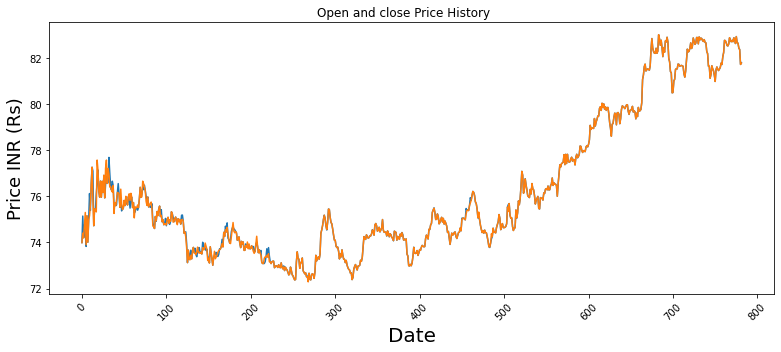

In [5]:
title = 'Open and close Price History    '
#Get the stocks
my_stocks = df
#Cr
plt.figure(figsize=(13,5)) 
plt.plot( my_stocks['Open'],  label='Open')
plt.plot( my_stocks['Close'],  label='close')
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Price INR (Rs)',fontsize=18)
plt.show()

In [6]:
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
MACD=ShortEMA-LongEMA
signal=MACD.ewm(span=9,adjust=False).mean()

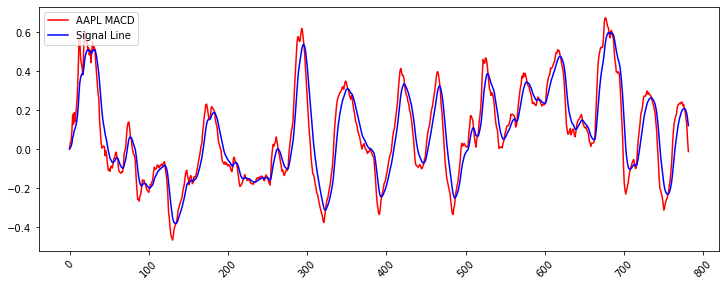

In [7]:
plt.figure(figsize=(12.2,4.5)) 
plt.plot(df.index, MACD, label='AAPL MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [8]:
df['MACD']= MACD
df['Signal']=signal

df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
0,09-03-2020,73.995300,75.062500,73.862503,73.995300,73.995300,0.0,0.000000,0.000000
1,10-03-2020,75.144997,75.144997,73.735497,74.405998,74.405998,0.0,0.032762,0.006552
2,11-03-2020,74.205002,74.404999,73.404503,74.205002,74.205002,0.0,0.042023,0.013647
3,12-03-2020,74.760002,75.379997,73.994499,74.760002,74.760002,0.0,0.093074,0.029532
4,13-03-2020,74.436096,75.434998,73.699501,75.300003,75.300003,0.0,0.175087,0.058643
...,...,...,...,...,...,...,...,...,...
777,01-03-2023,82.635399,82.878304,82.377998,82.635399,82.635399,0.0,0.190555,0.204287
778,02-03-2023,82.419899,82.657799,82.302101,82.419899,82.419899,0.0,0.156780,0.194786
779,03-03-2023,82.355698,82.581299,81.703903,82.355698,82.355698,0.0,0.123410,0.180510
780,06-03-2023,81.712502,81.970299,81.619003,81.712502,81.712502,0.0,0.044550,0.153318


In [9]:
label=[]
for i in range(0,len(df)):
    if df.MACD.iloc[i]> df.Signal.iloc[i]:
        label.append(1)
    else :
        label.append(0)

In [10]:
df['Label'] = label

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Label
0,09-03-2020,73.995300,75.062500,73.862503,73.995300,73.995300,0.0,0.000000,0.000000,0
1,10-03-2020,75.144997,75.144997,73.735497,74.405998,74.405998,0.0,0.032762,0.006552,1
2,11-03-2020,74.205002,74.404999,73.404503,74.205002,74.205002,0.0,0.042023,0.013647,1
3,12-03-2020,74.760002,75.379997,73.994499,74.760002,74.760002,0.0,0.093074,0.029532,1
4,13-03-2020,74.436096,75.434998,73.699501,75.300003,75.300003,0.0,0.175087,0.058643,1
...,...,...,...,...,...,...,...,...,...,...
777,01-03-2023,82.635399,82.878304,82.377998,82.635399,82.635399,0.0,0.190555,0.204287,0
778,02-03-2023,82.419899,82.657799,82.302101,82.419899,82.419899,0.0,0.156780,0.194786,0
779,03-03-2023,82.355698,82.581299,81.703903,82.355698,82.355698,0.0,0.123410,0.180510,0
780,06-03-2023,81.712502,81.970299,81.619003,81.712502,81.712502,0.0,0.044550,0.153318,0


In [12]:
df.set_index('Date',drop=True,inplace=True) 
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Label
Date,,,,,,,,,
09-03-2020,73.995300,75.062500,73.862503,73.995300,73.995300,0.0,0.000000,0.000000,0
10-03-2020,75.144997,75.144997,73.735497,74.405998,74.405998,0.0,0.032762,0.006552,1
11-03-2020,74.205002,74.404999,73.404503,74.205002,74.205002,0.0,0.042023,0.013647,1
12-03-2020,74.760002,75.379997,73.994499,74.760002,74.760002,0.0,0.093074,0.029532,1
13-03-2020,74.436096,75.434998,73.699501,75.300003,75.300003,0.0,0.175087,0.058643,1


In [13]:
x=df.drop('Label',1)
y=df.Label

C:\Users\riyag\AppData\Local\Temp\ipykernel_8332\201086547.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop('Label',1)


# Data Preprocessing

In [14]:
df.shape

(782, 9)

In [15]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MACD         0
Signal       0
Label        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 09-03-2020 to 07-03-2023
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       782 non-null    float64
 1   High       782 non-null    float64
 2   Low        782 non-null    float64
 3   Close      782 non-null    float64
 4   Adj Close  782 non-null    float64
 5   Volume     782 non-null    float64
 6   MACD       782 non-null    float64
 7   Signal     782 non-null    float64
 8   Label      782 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 61.1+ KB


In [17]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
MACD         float64
Signal       float64
Label          int64
dtype: object

# Splitting data for training and Testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
x_train

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
16-08-2022,79.552902,79.779999,79.261002,79.552902,79.552902,0.0,0.102248,0.122605
26-05-2022,77.497299,77.723999,77.468498,77.497299,77.497299,0.0,0.330845,0.340866
17-03-2022,76.024200,76.238503,75.759003,76.024200,76.024200,0.0,0.390128,0.386368
29-06-2021,74.285599,74.337799,74.189003,74.285400,74.285400,0.0,0.286244,0.176136
14-07-2021,74.659500,74.869003,74.456001,74.659103,74.659103,0.0,0.303864,0.307006
...,...,...,...,...,...,...,...,...
05-12-2022,81.422501,81.894997,81.193497,81.422501,81.422501,0.0,-0.098598,-0.086365
15-02-2023,82.867599,82.986000,82.759499,82.867599,82.867599,0.0,0.213798,0.091706
17-06-2020,76.403702,76.654999,76.094498,76.654999,76.654999,0.0,0.074204,-0.026874


In [21]:
x_test

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
31-08-2022,79.682297,79.743797,79.352997,79.682297,79.682297,0.0,0.156773,0.148679
15-03-2021,72.682999,72.781998,72.392303,72.682999,72.682999,0.0,-0.035853,-0.009688
11-08-2020,75.099998,75.099998,74.515999,75.099998,75.099998,0.0,-0.081729,-0.119059
04-05-2021,73.837502,74.476997,73.738503,73.837502,73.837502,0.0,0.185907,0.374497
25-06-2021,74.190300,74.390999,74.116798,74.190300,74.190300,0.0,0.265261,0.116874
...,...,...,...,...,...,...,...,...
03-03-2021,73.277496,73.319801,72.728798,73.277496,73.277496,0.0,0.023558,-0.081625
22-02-2022,74.523804,74.992401,74.523804,74.516998,74.516998,0.0,0.059063,0.097557
30-12-2021,74.570297,74.646202,74.293999,74.570297,74.570297,0.0,-0.002279,0.168384


In [22]:
y_train

Date
16-08-2022    0
26-05-2022    0
17-03-2022    1
29-06-2021    1
14-07-2021    0
             ..
05-12-2022    0
15-02-2023    1
17-06-2020    1
01-02-2021    1
29-04-2020    0
Name: Label, Length: 625, dtype: int64

In [23]:
y_test

Date
31-08-2022    1
15-03-2021    0
11-08-2020    1
04-05-2021    0
25-06-2021    1
             ..
03-03-2021    1
22-02-2022    0
30-12-2021    0
22-07-2021    0
20-10-2020    1
Name: Label, Length: 157, dtype: int64

# Standardization & Normalisation

In [24]:
x_train = x_train/100
x_test = x_test/100

In [25]:
x_train.shape

(625, 8)

In [26]:
x_test.shape

(157, 8)

Test Accuracy =  51.0
Train Accuracy =  52.0
              precision    recall  f1-score   support

           0       0.78      0.09      0.15        82
           1       0.49      0.97      0.65        75

    accuracy                           0.51       157
   macro avg       0.64      0.53      0.40       157
weighted avg       0.64      0.51      0.39       157



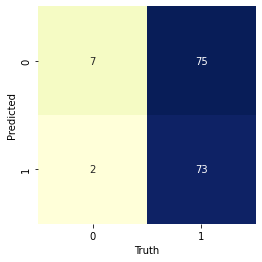

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
clf_0 = LogisticRegression().fit(x_train, y_train)

pred_y_0 = clf_0.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(pred_y_0, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(clf_0.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,pred_y_0) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test, pred_y_0))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        82
           1       0.90      0.93      0.92        75

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157

Test Accuracy =  92.0
Train Accuracy =  100.0


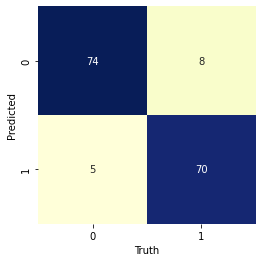

In [28]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

cd = confusion_matrix(y_test,y_predict)
sns.heatmap(cd, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score

print( "Test Accuracy = " ,accuracy_score(y_predict, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(DT.predict(x_train), y_train).round(2) * 100)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        82
           1       0.68      0.67      0.67        75

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157

Test Accuracy =  69.0


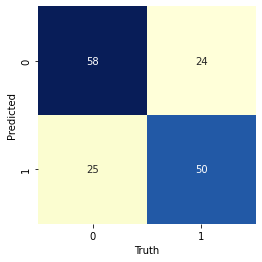

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()   # initial value
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test,pred))
print( "Test Accuracy = " ,accuracy_score(pred, y_test).round(2) * 100)

Text(0, 0.5, 'Error Rate')

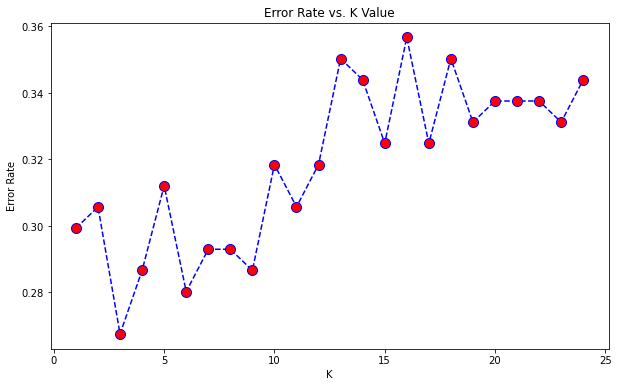

In [30]:
error_rate = []

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        82
           1       0.73      0.69      0.71        75

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157

TestAccuracy =  73.0
Train Accuracy =  86.0


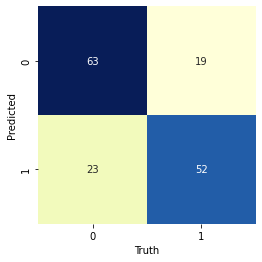

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test,pred))
print( "TestAccuracy = " ,accuracy_score(pred, y_test).round(2) * 100)
print("Train Accuracy = ",accuracy_score(knn.predict(x_train), y_train).round(2) * 100)

Test Accuracy =  48.0
Train Accuracy =  51.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.48      1.00      0.65        75

    accuracy                           0.48       157
   macro avg       0.24      0.50      0.32       157
weighted avg       0.23      0.48      0.31       157



C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


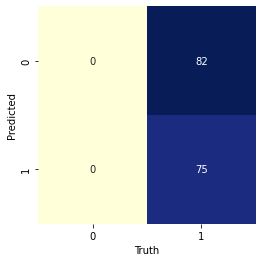

In [32]:
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train,y_train)
y_predict_a = clf.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(clf.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

Test Accuracy =  94.0
Train Accuracy =  99.0
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        82
           1       0.90      0.99      0.94        75

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.95      0.94      0.94       157



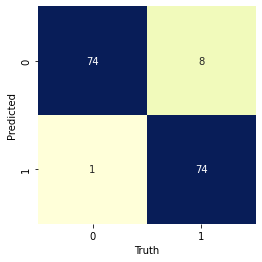

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict_a = gb.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(gb.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

Test Accuracy =  56.99999999999999
Train Accuracy =  54.0
              precision    recall  f1-score   support

           0       0.57      0.71      0.63        82
           1       0.57      0.43      0.49        75

    accuracy                           0.57       157
   macro avg       0.57      0.57      0.56       157
weighted avg       0.57      0.57      0.56       157



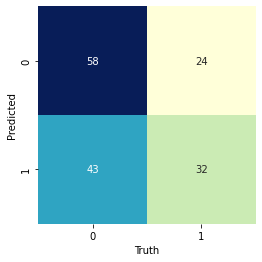

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict_a = nb.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(nb.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

Test Accuracy =  56.99999999999999
Train Accuracy =  54.0
              precision    recall  f1-score   support

           0       0.57      0.71      0.63        82
           1       0.57      0.43      0.49        75

    accuracy                           0.57       157
   macro avg       0.57      0.57      0.56       157
weighted avg       0.57      0.57      0.56       157



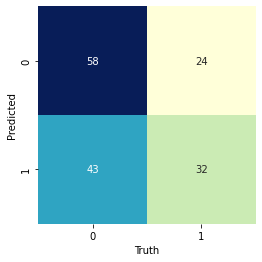

In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict_a = nb.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(nb.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

Test Accuracy =  48.0
Train Accuracy =  51.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.48      1.00      0.65        75

    accuracy                           0.48       157
   macro avg       0.24      0.50      0.32       157
weighted avg       0.23      0.48      0.31       157



C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


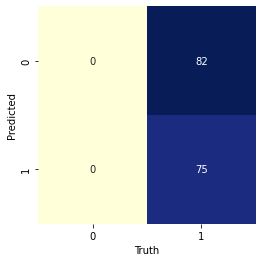

In [36]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(activation='relu')
NN.fit(x_train,y_train)
y_predict_a = NN.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(NN.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

In [37]:
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dense,Activation, Dropout,Flatten
from tensorflow.keras.optimizers.legacy import Adam,SGD

In [38]:
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units=8, return_sequences=True, input_shape =(x_train.shape[1],1), activation='sigmoid'))
model.add(LSTM(units=4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['Accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 8)              320       
                                                                 
 lstm_1 (LSTM)               (None, 4)                 208       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)

In [40]:
model.fit(x_train,y_train,epochs=200,callbacks=[early_stopping])

Epoch 1/200
20/20 [==============================] - 4s 9ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 2/200
20/20 [==============================] - 0s 8ms/step - loss: 0.2500 - Accuracy: 0.5136
Epoch 3/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 4/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 5/200
20/20 [==============================] - 0s 8ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 6/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 7/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2498 - Accuracy: 0.5136
Epoch 8/200
20/20 [==============================] - 0s 10ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 9/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2500 - Accuracy: 0.5136
Epoch 10/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2499 - Accuracy: 0.5136
Epoch 11

In [41]:
model.evaluate(x_train,y_train)

20/20 [==============================] - 1s 5ms/step - loss: 0.2498 - Accuracy: 0.5136


[0.24983273446559906, 0.5135999917984009]

In [42]:
evaluate=model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.2505 - Accuracy: 0.4777


In [43]:
y_predicted = model.predict(x_test)
y_predicted

5/5 [==============================] - 1s 4ms/step


array([[0.50925785],
       [0.5092181 ],
       [0.5092302 ],
       [0.5092281 ],
       [0.5092289 ],
       [0.509241  ],
       [0.5092574 ],
       [0.5092234 ],
       [0.5092364 ],
       [0.5092769 ],
       [0.5092196 ],
       [0.509273  ],
       [0.50927275],
       [0.5092187 ],
       [0.5092273 ],
       [0.5092472 ],
       [0.50926596],
       [0.5092342 ],
       [0.50924456],
       [0.5092221 ],
       [0.50923485],
       [0.509229  ],
       [0.50923413],
       [0.5092612 ],
       [0.5092193 ],
       [0.50927556],
       [0.5092738 ],
       [0.5092273 ],
       [0.50927323],
       [0.5092346 ],
       [0.50922096],
       [0.50925094],
       [0.5092632 ],
       [0.5092266 ],
       [0.50923467],
       [0.5092258 ],
       [0.50923246],
       [0.5092784 ],
       [0.50924134],
       [0.5092239 ],
       [0.50921935],
       [0.5092582 ],
       [0.50927484],
       [0.50922835],
       [0.50921565],
       [0.5092391 ],
       [0.509241  ],
       [0.509

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Text(91.68, 0.5, 'Predicted')

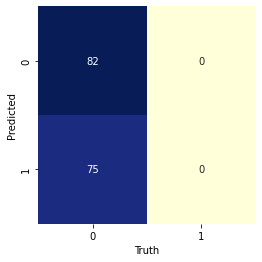

In [45]:
cl = confusion_matrix(y_test,y_predicted_labels) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [46]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        82
           1       0.00      0.00      0.00        75

    accuracy                           0.52       157
   macro avg       0.26      0.50      0.34       157
weighted avg       0.27      0.52      0.36       157



C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


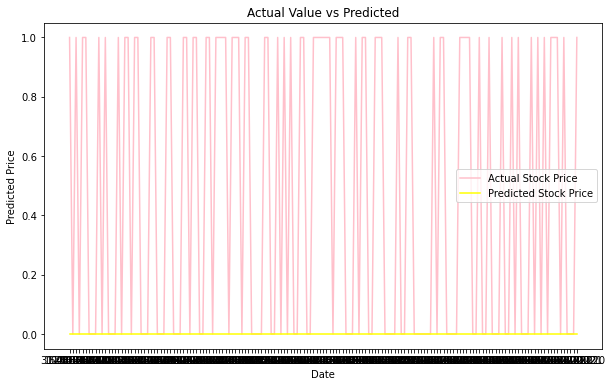

In [47]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='pink', label='Actual Stock Price')
plt.plot(y_predicted_labels, color='yellow', label='Predicted Stock Price')
plt.title('Actual Value vs Predicted')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test= lda.transform(x_test)

# Model

# Logistic Regression

Test Accuracy =  95.0
Train Accuracy =  98.0
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.92      0.97      0.95        75

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



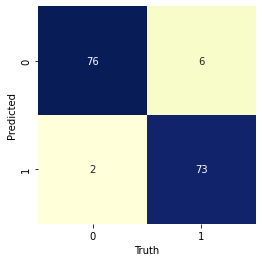

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
clf_0 = LogisticRegression().fit(x_train, y_train)

pred_y_0 = clf_0.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(pred_y_0, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(clf_0.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,pred_y_0) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test, pred_y_0))

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_0, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.976 0.984 0.976 0.968 0.992]
Average CV Score:  0.9792
Number of CV Scores used in Average:  5


# Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.92      0.97      0.95        75

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157

Test Accuracy =  95.0
Train Accuracy =  100.0


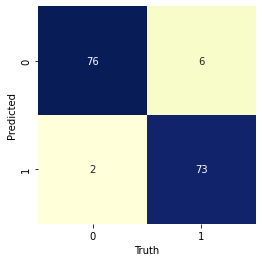

In [51]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

cd = confusion_matrix(y_test,y_predict)
sns.heatmap(cd, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score

print( "Test Accuracy = " ,accuracy_score(y_predict, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(DT.predict(x_train), y_train).round(2) * 100)

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.952 0.96  0.96  0.952 1.   ]
Average CV Score:  0.9648
Number of CV Scores used in Average:  5


# KNN

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.92      0.97      0.95        75

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157

Test Accuracy =  95.0


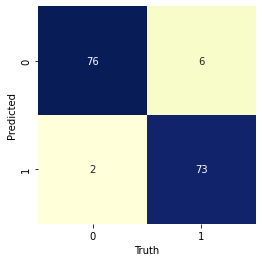

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()   # initial value
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test,pred))
print( "Test Accuracy = " ,accuracy_score(pred, y_test).round(2) * 100)

Text(0, 0.5, 'Error Rate')

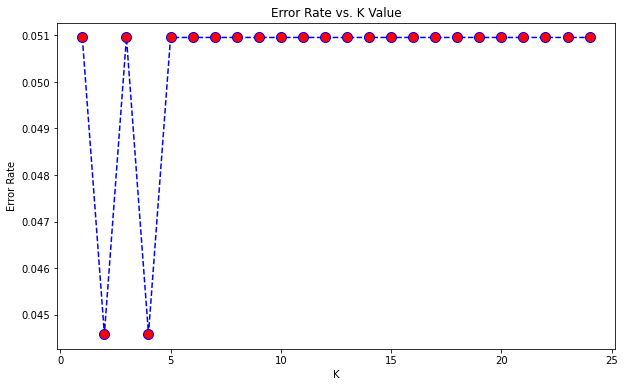

In [54]:
error_rate = []

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        82
           1       0.94      0.97      0.95        75

    accuracy                           0.96       157
   macro avg       0.96      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157

TestAccuracy =  96.0
Train Accuracy =  98.0


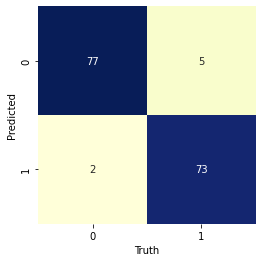

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test,pred))
print( "TestAccuracy = " ,accuracy_score(pred, y_test).round(2) * 100)
print("Train Accuracy = ",accuracy_score(knn.predict(x_train), y_train).round(2) * 100)

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.976 0.984 0.976 0.976 1.   ]
Average CV Score:  0.9823999999999999
Number of CV Scores used in Average:  5


# SVM

Test Accuracy =  94.0
Train Accuracy =  98.0
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        82
           1       0.91      0.97      0.94        75

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



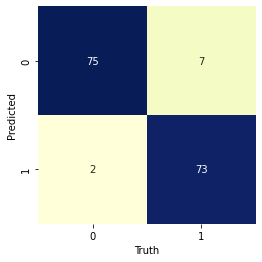

In [57]:
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train,y_train)
y_predict_a = clf.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(clf.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.968 0.984 0.976 0.976 0.992]
Average CV Score:  0.9792
Number of CV Scores used in Average:  5


# Gradient boost

Test Accuracy =  95.0
Train Accuracy =  100.0
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.92      0.97      0.95        75

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



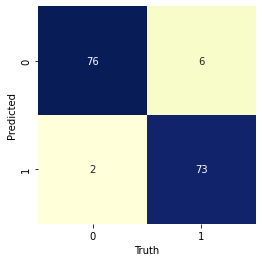

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict_a = gb.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(gb.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.952 0.96  0.96  0.952 1.   ]
Average CV Score:  0.9648
Number of CV Scores used in Average:  5


# Naive Bayes

Test Accuracy =  94.0
Train Accuracy =  98.0
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        82
           1       0.91      0.97      0.94        75

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



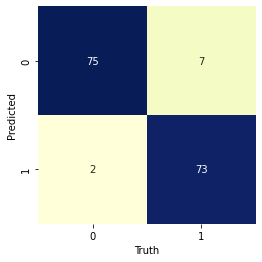

In [61]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict_a = nb.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(nb.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.976 0.984 0.976 0.968 0.992]
Average CV Score:  0.9792
Number of CV Scores used in Average:  5


# Neural network

Test Accuracy =  94.0
Train Accuracy =  98.0
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        82
           1       0.91      0.97      0.94        75

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


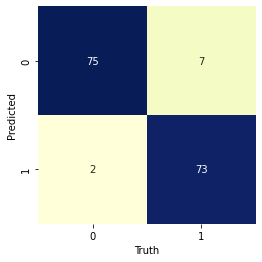

In [63]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(activation='relu')
NN.fit(x_train,y_train)
y_predict_a = NN.predict(x_test)

print( "Test Accuracy = " ,accuracy_score(y_predict_a, y_test).round(2) * 100)
print( "Train Accuracy = " ,accuracy_score(NN.predict(x_train), y_train).round(2) * 100)

cl = confusion_matrix(y_test,y_predict_a) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

print(classification_report(y_test,y_predict_a))

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(NN, x_train, y_train, cv = 5,scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross Validation Scores:  [0.976 0.976 0.976 0.968 0.992]
Average CV Score:  0.9776
Number of CV Scores used in Average:  5


C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dense,Activation, Dropout,Flatten
from tensorflow.keras.optimizers.legacy import Adam,SGD

In [66]:
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units=8, return_sequences=True, input_shape =(x_train.shape[1],1), activation='sigmoid'))
model.add(LSTM(units=4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['Accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 8)              320       
                                                                 
 lstm_3 (LSTM)               (None, 4)                 208       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [67]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)

In [68]:
model.fit(x_train,y_train,epochs=200,callbacks=[early_stopping])

Epoch 1/200
20/20 [==============================] - 4s 4ms/step - loss: 0.2531 - Accuracy: 0.4864
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2521 - Accuracy: 0.4864
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2513 - Accuracy: 0.4864
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 0.2506 - Accuracy: 0.4864
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2499 - Accuracy: 0.4864
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.2493 - Accuracy: 0.4864
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2486 - Accuracy: 0.5088
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2479 - Accuracy: 0.7840
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2472 - Accuracy: 0.8928
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2465 - Accuracy: 0.7760
Epoch 11/

20/20 [==============================] - 0s 5ms/step - loss: 0.0415 - Accuracy: 0.9808
Epoch 84/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0409 - Accuracy: 0.9808
Epoch 85/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0402 - Accuracy: 0.9808
Epoch 86/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0397 - Accuracy: 0.9808
Epoch 87/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0391 - Accuracy: 0.9808
Epoch 88/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0385 - Accuracy: 0.9808
Epoch 89/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0380 - Accuracy: 0.9808
Epoch 90/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0375 - Accuracy: 0.9808
Epoch 91/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0370 - Accuracy: 0.9808
Epoch 92/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0365 - Accuracy: 0.9808
Epoch 93/200


20/20 [==============================] - 0s 5ms/step - loss: 0.0216 - Accuracy: 0.9776
Epoch 165/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0216 - Accuracy: 0.9760
Epoch 166/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0215 - Accuracy: 0.9776
Epoch 167/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0214 - Accuracy: 0.9760
Epoch 168/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0213 - Accuracy: 0.9776
Epoch 169/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0212 - Accuracy: 0.9776
Epoch 170/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0212 - Accuracy: 0.9760
Epoch 171/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0211 - Accuracy: 0.9760
Epoch 172/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0210 - Accuracy: 0.9776
Epoch 173/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0210 - Accuracy: 0.9776
Epoc

In [69]:
model.evaluate(x_train,y_train)

20/20 [==============================] - 1s 3ms/step - loss: 0.0195 - Accuracy: 0.9776


[0.01951049268245697, 0.9775999784469604]

In [70]:
evaluate=model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0328 - Accuracy: 0.9427


In [71]:
y_predicted = model.predict(x_test)
y_predicted

5/5 [==============================] - 0s 4ms/step


array([[0.89093286],
       [0.04826069],
       [0.9612229 ],
       [0.03578858],
       [0.9630462 ],
       [0.95940024],
       [0.03587446],
       [0.08572093],
       [0.0375124 ],
       [0.9622732 ],
       [0.5260098 ],
       [0.96305794],
       [0.03590641],
       [0.5933479 ],
       [0.08463664],
       [0.9630517 ],
       [0.03579554],
       [0.96269107],
       [0.9630003 ],
       [0.03584278],
       [0.96287876],
       [0.9546767 ],
       [0.03636653],
       [0.03578683],
       [0.15587889],
       [0.9630294 ],
       [0.963006  ],
       [0.0358335 ],
       [0.04216573],
       [0.03799468],
       [0.93765795],
       [0.8727369 ],
       [0.03578741],
       [0.03581066],
       [0.03586062],
       [0.95970434],
       [0.95993173],
       [0.05528966],
       [0.95874995],
       [0.9628232 ],
       [0.8627625 ],
       [0.14126433],
       [0.9630079 ],
       [0.9452446 ],
       [0.03625576],
       [0.89477706],
       [0.9629996 ],
       [0.962

In [72]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [73]:
y_predicted_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Text(91.68, 0.5, 'Predicted')

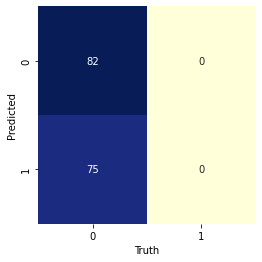

In [74]:
cl = confusion_matrix(y_test,y_predicted_labels) 
sns.heatmap(cl, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [75]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        82
           1       0.00      0.00      0.00        75

    accuracy                           0.52       157
   macro avg       0.26      0.50      0.34       157
weighted avg       0.27      0.52      0.36       157



C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyag\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


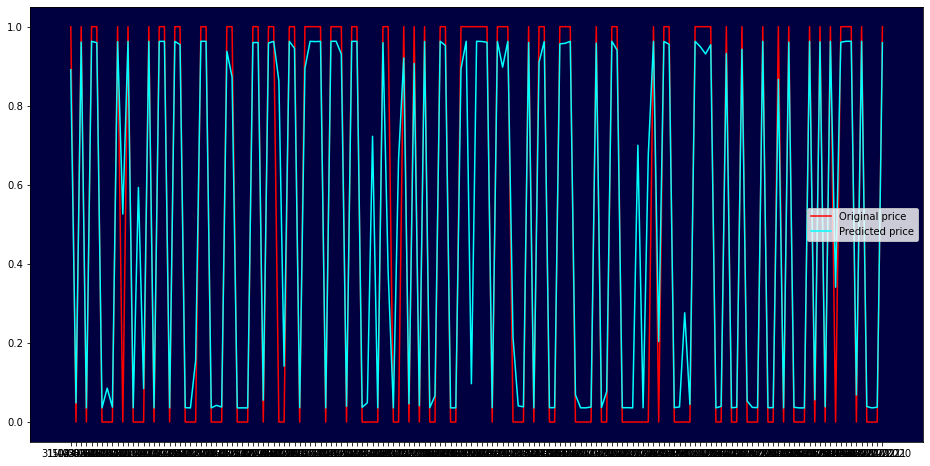

In [76]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(y_predicted, color='cyan', label='Predicted price')
plt.legend()